### Sesi - 6 . CLEANING DATA with PANDAS

In [65]:
import numpy as np
import pandas as pd

In [66]:
prop_data = pd.read_csv('Data\property_data.csv')
prop_data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [67]:
prop_data.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600


In [68]:
#deteksi missing value dengan menggunakan pandas
#standard missing value
prop_data['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [38]:
prop_data['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [39]:
#Non-Standard missing value
#seyogyanya dimasukkan kedalam list

prop_data['NUM_BEDROOMS'] # <== ROW 3,6,9 N/A, ROW 8 '--'

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [69]:
prop_data['NUM_BEDROOMS'].isnull()  # <== row 8,9 adalah non missing valuue

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [70]:
NUM_ERROR = ['NaN', 'na', 'N/A', '--']
prop_data = pd.read_csv('Data\property_data.csv', na_values = NUM_ERROR)
prop_data['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [48]:
prop_data['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [43]:
prop_data['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [71]:
prop_data['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [72]:
#unexpcted missing value
#biasanya adalah value dalam 1 kolom misalnya text namun berisi angka, begitu pula sebaliknya

In [73]:
prop_data['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [74]:
counter = 0 # hitung jumlah row
for row in prop_data['OWN_OCCUPIED']:
    try:
        int(row) # kalau berhasil convert ke integer, berarti datanya tipe angka
        prop_data.loc[counter, 'OWN_OCCUPIED'] = np.nan
    except ValueError:
        pass
    finally:
        counter += 1
    
prop_data.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [75]:
prop_data.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [76]:
#nilai hilang
prop_data.isnull().values.any()

True

In [77]:
#jumlah total missing value
prop_data.isnull().sum().sum()

12

## Replacing Missing Value

Cara umum untuk mengganti 'missing value' adalah dengan menggunakan MEDIAN, cara lainnya adalah menggantinya dengan nilai spesifik

In [78]:
prop_data['ST_NUM'].fillna(125, inplace=True)
prop_data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [79]:
prop_data.isnull().any()

PID              True
ST_NUM          False
ST_NAME         False
OWN_OCCUPIED     True
NUM_BEDROOMS     True
NUM_BATH         True
SQ_FT            True
dtype: bool

In [80]:
Median_ = prop_data['NUM_BEDROOMS'].median()

In [81]:
prop_data['NUM_BEDROOMS'].fillna(Median_, inplace=True) #<== missing value replace by 'median'
prop_data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [62]:
prop_data.isnull().any()

PID              True
ST_NUM          False
ST_NAME         False
OWN_OCCUPIED     True
NUM_BEDROOMS    False
NUM_BATH         True
SQ_FT            True
dtype: bool

### OBESITY IN ENGLAND

# - CHILDREN ARE GETTING FATTER IN DECADE -

In [133]:
obesitas = pd.ExcelFile('Data/obes.xls')

In [134]:
obesitas.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [136]:
data_obes = obesitas.parse(u'7.2', skiprows=4, skipfooters=14)
data_obes.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [137]:
data_obes.rename(columns={'Unnamed: 0' : 'Year'}, inplace=True)
data_obes.head()

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [138]:
data_obes.dropna(inplace=True)
data_obes.head()   #<== angka 1 didepan adalah index yang merupakan default dari excel, sehingga alangkah lebih baik kalau nanti dibuat plot, maka bisa diganti dengan tahun misalnya

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


In [139]:
data_obes.set_index('Year', inplace=True)

In [140]:
data_obes

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [151]:
data_obes.loc['2012/13']

Total          10957.0
Under 16         556.0
16-24            356.0
25-34           1437.0
35-44           2744.0
45-54           3305.0
55-64           1965.0
65-74            495.0
75 and over       99.0
Name: 2012/13, dtype: float64

<AxesSubplot:xlabel='Year'>

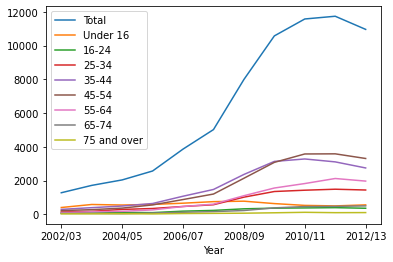

In [141]:
data_obes.plot() #<== data total menutupi data per umur lainnya

<AxesSubplot:xlabel='Year'>

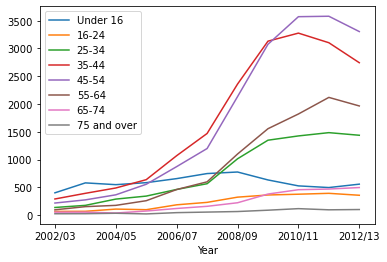

In [144]:
data_obes_minus_total = data_obes.drop('Total', axis=1)
data_obes_minus_total.plot()

<AxesSubplot:xlabel='Year'>

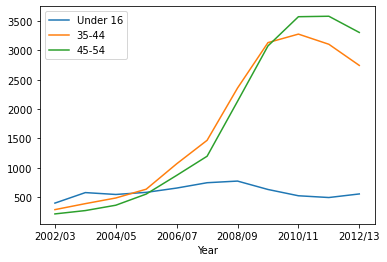

In [149]:
data_obes['Under 16'].plot(label='Under 16', legend=True)
data_obes['35-44'].plot(label='35-44', legend=True)
data_obes['45-54'].plot(label='45-54', legend=True)

kesimpulan : yang terkena obesitas adalah pada rentang umur 35-44 dan 45-54 daripada anak anak dibawah umur 16 tahun.

### TIME SERIES

Manipulasi dasar TIME SERIES

In [237]:
from datetime import datetime
range_date = pd.date_range(start='01/01/2020', end='01/08/2020', freq='H')

In [238]:
range_date #<== ada 169 items

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [240]:
dataframe1 = pd.DataFrame(range_date, columns=['Tanggal'])
dataframe1

,Tanggal
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
164,2020-01-07 20:00:00
165,2020-01-07 21:00:00
166,2020-01-07 22:00:00
167,2020-01-07 23:00:00


In [167]:
#isi random data di masing masing index tanggal dan jam

In [241]:
dataframe1['Isian_data'] = np.random.randint(0,100,size=(len(range_date)))
dataframe1.head()

,Tanggal,Isian_data
0,2020-01-01 00:00:00,19
1,2020-01-01 01:00:00,72
2,2020-01-01 02:00:00,94
3,2020-01-01 03:00:00,18
4,2020-01-01 04:00:00,82


In [242]:
#jadikan timestamp as index and replace index 0,1,dst

dataframe1['datetime'] = pd.to_datetime(dataframe1['Tanggal'])
dataframe1.head()

,Tanggal,Isian_data,datetime
0,2020-01-01 00:00:00,19,2020-01-01 00:00:00
1,2020-01-01 01:00:00,72,2020-01-01 01:00:00
2,2020-01-01 02:00:00,94,2020-01-01 02:00:00
3,2020-01-01 03:00:00,18,2020-01-01 03:00:00
4,2020-01-01 04:00:00,82,2020-01-01 04:00:00


In [243]:
dataframe1 = dataframe1.set_index('datetime')
dataframe1.head()

,Tanggal,Isian_data
datetime,,
2020-01-01 00:00:00,2020-01-01 00:00:00,19
2020-01-01 01:00:00,2020-01-01 01:00:00,72
2020-01-01 02:00:00,2020-01-01 02:00:00,94
2020-01-01 03:00:00,2020-01-01 03:00:00,18
2020-01-01 04:00:00,2020-01-01 04:00:00,82


In [244]:
dataframe1.drop(['Tanggal'], axis=1, inplace=True)
dataframe1.head()

,Isian_data
datetime,
2020-01-01 00:00:00,19
2020-01-01 01:00:00,72
2020-01-01 02:00:00,94
2020-01-01 03:00:00,18
2020-01-01 04:00:00,82


# timestamp from string to datetime atau sebaliknya

In [245]:
#ubah range_date menjadi string
string_range_date = [str(x) for x in range_date]
string_range_date

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [247]:
dataframe1['2020-01-05']

<ipython-input-247-b023406f1b2a>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dataframe1['2020-01-05']


,Isian_data
datetime,
2020-01-05 00:00:00,34
2020-01-05 01:00:00,70
2020-01-05 02:00:00,55
2020-01-05 03:00:00,31
2020-01-05 04:00:00,49
2020-01-05 05:00:00,77
2020-01-05 06:00:00,48
2020-01-05 07:00:00,45
2020-01-05 08:00:00,7


In [248]:
dataframe1['2020-01-05'].shape

<ipython-input-248-2ae0444a0eb6>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dataframe1['2020-01-05'].shape


(24, 1)

In [249]:
#ambil range time
dataframe1['2020-01-04' : '2020-01-06']

,Isian_data
datetime,
2020-01-04 00:00:00,55
2020-01-04 01:00:00,94
2020-01-04 02:00:00,49
2020-01-04 03:00:00,66
2020-01-04 04:00:00,96
...,...
2020-01-06 19:00:00,70
2020-01-06 20:00:00,5
2020-01-06 21:00:00,6


In [250]:
#mensummary kan data per tanggal --> sum, mean, etc
dataframe1.resample('D').sum() # <== jumlahan per tanggal

,Isian_data
datetime,
2020-01-01,1184
2020-01-02,1248
2020-01-03,1337
2020-01-04,1574
2020-01-05,1320
2020-01-06,1253
2020-01-07,1288
2020-01-08,32


In [251]:
dataframe1.resample('D').mean()

,Isian_data
datetime,
2020-01-01,49.333333
2020-01-02,52.000000
2020-01-03,55.708333
2020-01-04,65.583333
2020-01-05,55.000000
2020-01-06,52.208333
2020-01-07,53.666667
2020-01-08,32.000000


In [253]:
#bisa juga untuk tau rolling setelah beberapa hari
dataframe1.resample('D').sum().rolling(3).sum() # <== rolling per 3 hari

,Isian_data
datetime,
2020-01-01,NaN
2020-01-02,NaN
2020-01-03,3769.0
2020-01-04,4159.0
2020-01-05,4231.0
2020-01-06,4147.0
2020-01-07,3861.0
2020-01-08,2573.0


In [211]:
#ubah dari string menjadi timestamp lagi
timestamp_date_range = pd.to_datetime(string_range_date, infer_datetime_format=True)
timestamp_date_range

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [215]:
# bagaimana jika mengubah unique string datetime
# contoh mulai tanggal 01 June 2020 sampai dengan 03 June 2020

string_range_date2 = ['June-01-2020', 'June-02-2020', 'June-03-2020']
timestamp_range_date2 = [datetime.strptime(x,'%B-%d-%Y') for x in string_range_date2]
timestamp_range_date2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [218]:
#put into dataframe
dataframe2 = pd.DataFrame(timestamp_range_date2, columns=['Tanggal'])
dataframe2

,Tanggal
0,2020-06-01
1,2020-06-02
2,2020-06-03


## TIME SERIES on Dataset

In [275]:
opsd_daily = pd.read_csv('Data/opsd_germany.csv')

In [276]:
opsd_daily.shape

(4383, 5)

In [277]:
opsd_daily.head(5)

,Date,Consumption,Wind,Solar,Wind+Solar
0,01/01/2006,1069.184,NaN,NaN,NaN
1,02/01/2006,1380.521,NaN,NaN,NaN
2,03/01/2006,1442.533,NaN,NaN,NaN
3,04/01/2006,1457.217,NaN,NaN,NaN
4,05/01/2006,1477.131,NaN,NaN,NaN


In [278]:
opsd_daily.tail(5)

,Date,Consumption,Wind,Solar,Wind+Solar
4378,27/12/2017,1263.94091,394.507,16.530,411.037
4379,28/12/2017,1299.86398,506.424,14.162,520.586
4380,29/12/2017,1295.08753,584.277,29.854,614.131
4381,30/12/2017,1215.44897,721.247,7.467,728.714
4382,31/12/2017,1107.11488,721.176,19.980,741.156


In [279]:
#jadikan kolom date as index
opsd_daily = opsd_daily.set_index('Date')

In [280]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
01/01/2006,1069.18400,NaN,NaN,NaN
02/01/2006,1380.52100,NaN,NaN,NaN
03/01/2006,1442.53300,NaN,NaN,NaN
04/01/2006,1457.21700,NaN,NaN,NaN
05/01/2006,1477.13100,NaN,NaN,NaN
...,...,...,...,...
27/12/2017,1263.94091,394.507,16.530,411.037
28/12/2017,1299.86398,506.424,14.162,520.586
29/12/2017,1295.08753,584.277,29.854,614.131


In [281]:
opsd_daily.index

Index(['01/01/2006', '02/01/2006', '03/01/2006', '04/01/2006', '05/01/2006',
       '06/01/2006', '07/01/2006', '08/01/2006', '09/01/2006', '10/01/2006',
       ...
       '22/12/2017', '23/12/2017', '24/12/2017', '25/12/2017', '26/12/2017',
       '27/12/2017', '28/12/2017', '29/12/2017', '30/12/2017', '31/12/2017'],
      dtype='object', name='Date', length=4383)

In [284]:
#karena tipe data index masih object, maka perlu diubah ke datetime
opsd_daily = pd.read_csv('Data/opsd_germany.csv', index_col=0, parse_dates=True)

In [285]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [287]:
#add kolom Year, Month, Day di opsd_daily
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [288]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-02-01,1380.521,NaN,NaN,NaN,2006,2,2
2006-03-01,1442.533,NaN,NaN,NaN,2006,3,2
2006-04-01,1457.217,NaN,NaN,NaN,2006,4,5
2006-05-01,1477.131,NaN,NaN,NaN,2006,5,0


In [290]:
#check info tanggal 07 May 2006
opsd_daily.loc['2017-08-17']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2017-08-17,1377.745,207.76,143.193,350.953,2017,8,3


In [291]:
opsd_daily.loc['2015-05-12' : '2015-05-15']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2015-05-13,1395.238,223.766,177.510,401.276,2015,5,2
2015-05-14,1098.291,77.642,145.415,223.057,2015,5,3
2015-05-15,1245.490,55.131,145.869,201.000,2015,5,4
2015-05-12,1337.095,584.727,37.127,621.854,2015,5,1


In [293]:
#cek only bulan februari 2014
opsd_daily.loc['2014-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-02-01,1343.101,304.166,13.680,317.846,2014,2,5
2014-02-02,1265.416,107.799,33.744,141.543,2014,2,6
2014-02-13,1602.375,270.977,45.448,316.425,2014,2,3
2014-02-14,1570.213,283.346,77.220,360.566,2014,2,4
2014-02-15,1347.503,477.891,41.842,519.733,2014,2,5
2014-02-16,1237.654,408.778,42.372,451.150,2014,2,6
2014-02-17,1548.644,101.830,78.833,180.663,2014,2,0
2014-02-18,1582.932,96.737,60.528,157.265,2014,2,1
2014-02-19,1588.602,113.180,30.109,143.289,2014,2,2


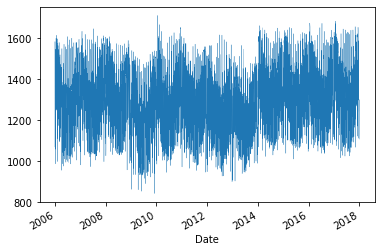

In [299]:
opsd_daily['Consumption'].plot(linewidth = 0.3);

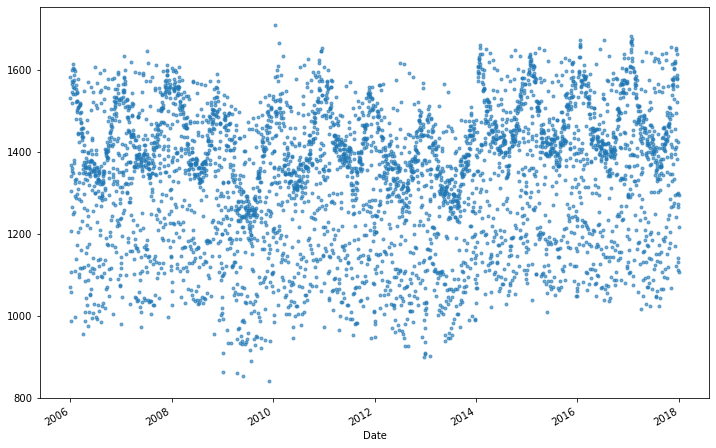

In [311]:
#plot as titik titik
opsd_daily['Consumption'].plot(marker='.', alpha=0.6, linestyle='None', figsize=(12, 8));

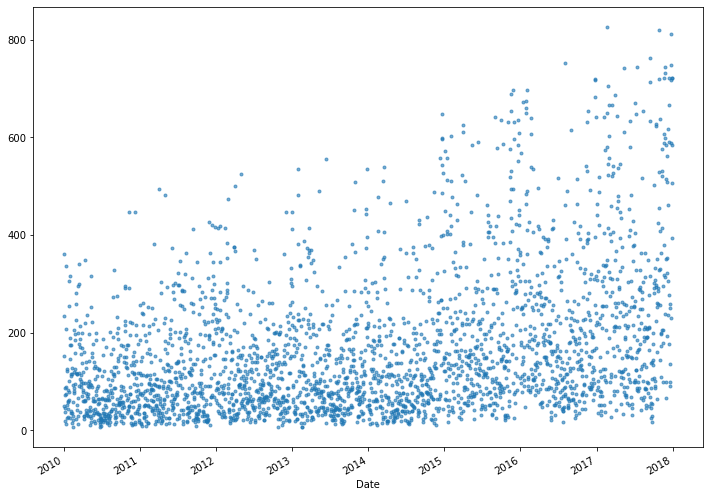

In [318]:
#plot wind 
opsd_daily['Wind'].plot(marker='.', alpha=0.6, linestyle="None", figsize=(12,9));

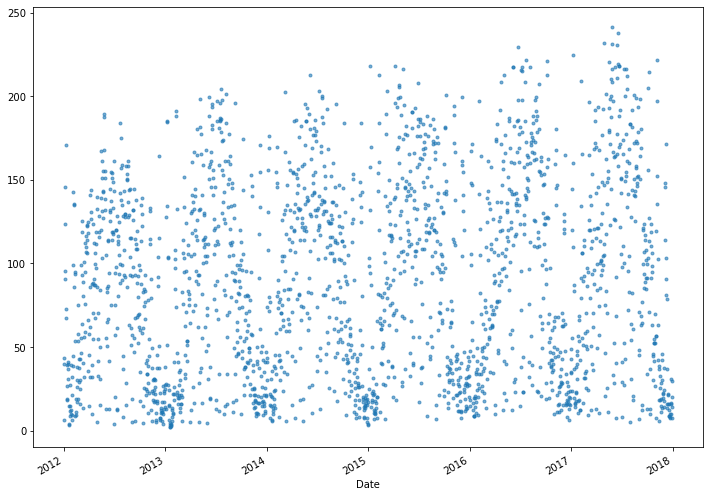

In [325]:
#plot solar
opsd_daily['Solar'].plot(marker=".", linestyle='None', alpha=0.6, figsize=(12,9));

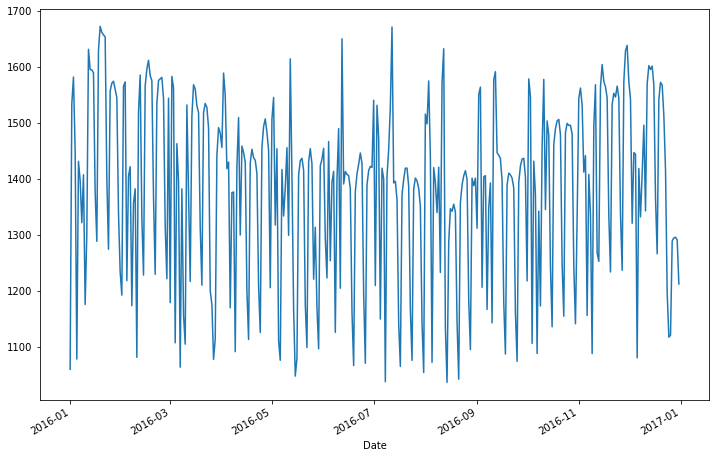

In [328]:
#plot setahun only
opsd_daily.loc['2016', 'Consumption'].plot(figsize=(12,8));

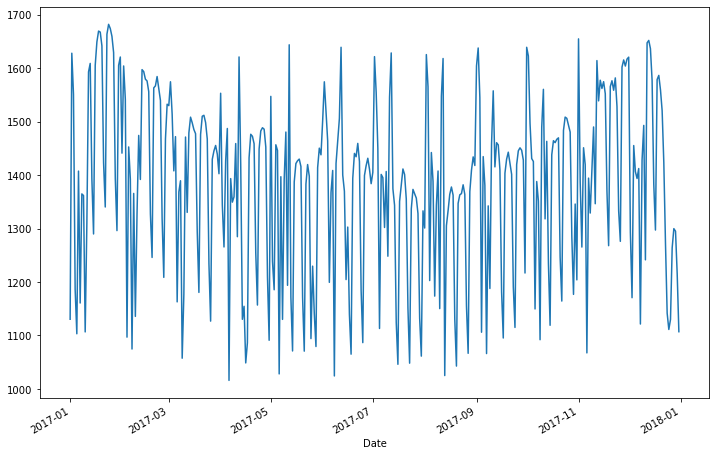

In [329]:
opsd_daily.loc['2017', 'Consumption'].plot(figsize=(12,8));

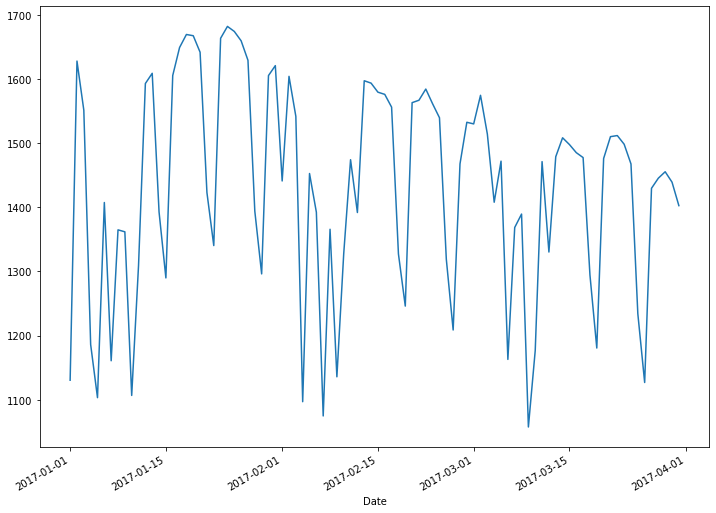

In [331]:
#cek mingguan di 2017
opsd_daily.loc['2017-01' : '2017-03', 'Consumption'].plot(figsize=(12,9));

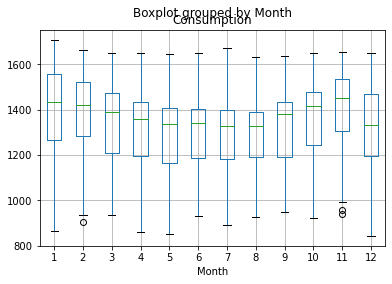

In [336]:
#explore seasonality by month using boxplot
opsd_daily.boxplot(column='Consumption', by='Month');

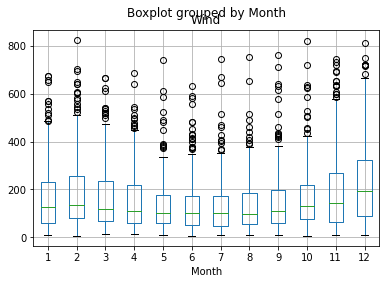

In [339]:
opsd_daily.boxplot(column='Wind', by='Month');

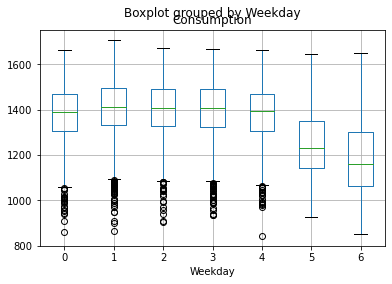

In [341]:
#explore by weekly using boxplot
opsd_daily.boxplot(column='Consumption', by='Weekday');

in weekend, konsumsi listrik menurun.
outlier rendah pada hari kerja

## resample

In [348]:
opsd_weekly_mean = opsd_daily[data_columns].resample('W').sum()
opsd_weekly_mean.head(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,0.0,0.0,0.0
2006-01-08,9085.191,0.0,0.0,0.0
2006-01-15,9439.014,0.0,0.0,0.0
2006-01-22,10430.218,0.0,0.0,0.0
2006-01-29,10599.238,0.0,0.0,0.0


In [349]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1297.884429,NaN,NaN,NaN
2006-01-15,1348.430571,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


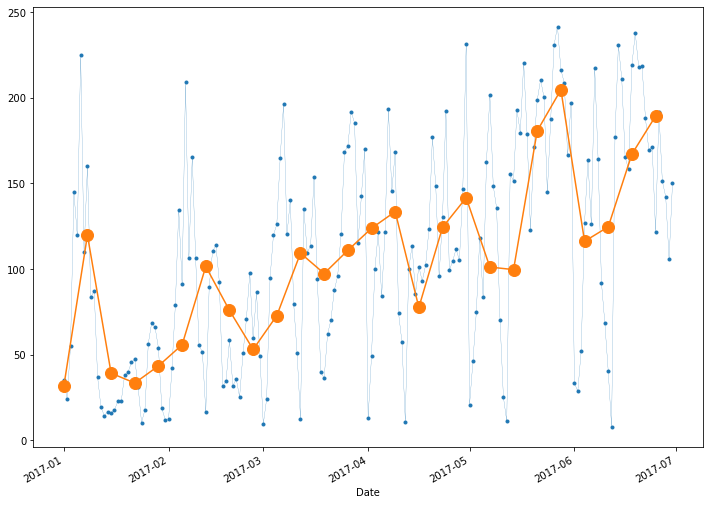

In [363]:
#graph solar harian versus mingguan dalam rentang Januari dan Juni 2017

start, end = '2017-01' ,'2017-06'
opsd_daily.loc[start:end, 'Solar'].plot(marker='.', linestyle="-", linewidth=0.2, figsize=(12,9));
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='o', markersize=12, linestyle='-');


dapat diambil kesimpulan bahwa deret sampling di mingguan tampak lebih halus jika dibandingkan dengn daily